# Display financial data.

This notebook assumes that you have downloaded daily data for each stock of the PHLX Oil Services Sector (^OLX) and the data is stored in CSV format with names: {ticker}\_data.csv. For example, for the CHX stocks the data is stored in CHX_data.csv.

All finantial data can be found in Yahoo finance [here](https://finance.yahoo.com/quote/%5EOSX/components?p=%5EOSX). The data can be manually downloaded from the web page and, while one can set up a downloading script in Python, I prefer not to publish it.

This notebook does the following:

1. Display the form of the correlation matrices: $\Sigma$ and $g$ for data between selected dates.

2. Plot the returns of the index and of each individual stock for a selected range of dates.

In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd

sys.path.append('../')
from index_tracking.get_data import make_correlation_matrices, read_stock_data

## Parameters

* Ticker name of the index
* Ticker name of the stocks
* Location of the stored market data
* Date range between which data is analysed

In [2]:
ticker_index = 'OSX'
# Tickers inside the index
tickers = ['CHX', 'CLB', 'DRQ', 'GLNG',
           'HAL', 'HP', 'LBRT', 'NBR', 
           'NOV', 'OII', 'OIS', 'RIG',  
           'SLB', 'USAC', 'WHD']
# Location where all stock data is stored.
data_location = '../../../data/'
# Day range of data.
day_first = '2021-01-10'
day_last  = '2021-01-30'

## Plot correlation matrices

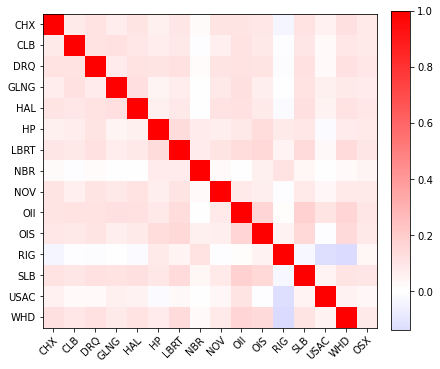

In [3]:
def plot_correlation_matrices():
    Σ, g, ϵ0 = make_correlation_matrices(
        ticker_index, tickers, data_location, day_first, day_last
    )         
    
    N = len(tickers)
    
    # PLOTS.
    viridis_big = cm.get_cmap('bwr', 512)
    mins = np.min(Σ)
    b = mins/2 + 0.5
    newcmp = ListedColormap(viridis_big(np.linspace(b, 1.0, 256)))

    fig, ax = plt.subplots(1, 1, figsize=(6, 5), constrained_layout=True)
    # Reshape g to put it toghether with Σ.
    g = np.reshape(g, (N, 1))
    im = ax.imshow(np.concatenate((Σ, g), axis=1), cmap=newcmp)
    
    ax.set_xticks(np.arange(N+1))
    ax.set_yticks(np.arange(N))
    ax.set_xticklabels([*tickers, ticker_index])
    ax.set_yticklabels(tickers)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    plt.colorbar(im, ax=ax)
    
    plt.show()
    
    return

plot_correlation_matrices()

## Plot daily return data

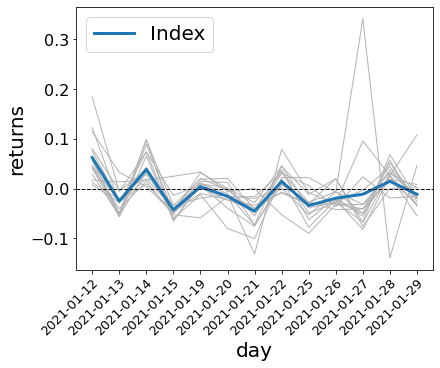

In [4]:
def plot_daily_returns():
    
    # Get daily returns of the index and all stocks.
    rI = read_stock_data(
        ticker_index, data_location, day_first, day_last
    )         
    
    N = len(tickers)
    r = []
    for ix, ticker in enumerate(tickers):
        rstock = read_stock_data(
            ticker, data_location, day_first, day_last
        )    
        r.append(rstock)
    
    # Get market dates between first and last days.
    datafile = data_location + f'{ticker_index}_data.csv'
    df = pd.read_csv(datafile, parse_dates=['Date'])
    dates = df.loc[(df['Date'] >= day_first) & (df['Date'] <= day_last),'Date'].to_list()
    dates = [date.strftime('%Y-%m-%d') for date in dates]
    
    # PLOTS.
    lfs = 20
    tfs = 16
    
    fig, ax = plt.subplots(1, 1, figsize=(6, 5), constrained_layout=True)
    
    # Plot returns.
    for i in range(N):
        ax.plot(r[i], '0.7', lw=1)
    ax.plot(rI, lw=3, label='Index')
        
    # Indicate zero returns.
    ax.axhline(0.0, c='k', ls='--', lw=1)
    
    ax.legend(fontsize=lfs)
    
    # Labels and ticks.
    ax.set_xlabel('day', fontsize=lfs)
    ax.set_ylabel('returns', fontsize=lfs)
    
    ax.set_xticks(np.arange(len(dates)-1))
    ax.set_xticklabels(dates[1:])
    
    ax.tick_params(axis='x', labelsize=0.8*tfs) 
    ax.tick_params(axis='y', labelsize=tfs) 
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    
    plt.show()
    
    return

plot_daily_returns()